## 1. Simple Visualization for mxnet

In [1]:
# https://mxnet.incubator.apache.org/faq/visualize_graph.html
import mxnet as mx
print("mxnet version is {}".format(mx.__version__))
user = mx.symbol.Variable('user')
item = mx.symbol.Variable('item')
score = mx.symbol.Variable('score')

mxnet version is 1.6.0


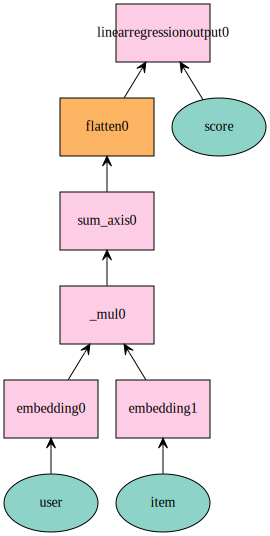

In [2]:
# Set dummy dimensions
k = 64
max_user = 100
max_item = 50

# user feature lookup
user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)

# item feature lookup
item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)

# predict by the inner product, which is elementwise product and then sum
net = user * item
net = mx.symbol.sum_axis(data = net, axis = 1)
net = mx.symbol.Flatten(data = net)

# loss layer, refer to https://github.com/apache/incubator-mxnet/issues/19177#issuecomment-694884423
net = mx.symbol.LinearRegressionOutput(data = net, label = score)

# Visualize your network
mx.viz.plot_network(net)

## 2. Visualization for mxnet network

http://josephpcohen.com/w/visualizing-cnn-architectures-side-by-side-with-mxnet/

In [3]:
# Bug : for how to visualize inception-v3
# import find_mxnet
from mxnet.gluon.model_zoo import vision
import mxnet as mx
import importlib

name = "Inception3"
net = vision.inception_v3(pretrained=True)
print(net)
## still with problems
# net = importlib.import_module("symbol_" + name).get_symbol(2)
# a = mx.viz.plot_network(net, shape={"data":(1, 1, 299, 299)}, node_attrs={"shape":'rect',"fixedsize":'false'})
# a.render(name)

Inception3(
  (features): HybridSequential(
    (0): HybridSequential(
      (0): Conv2D(3 -> 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm(axis=1, eps=0.001, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
      (2): Activation(relu)
    )
    (1): HybridSequential(
      (0): Conv2D(32 -> 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (1): BatchNorm(axis=1, eps=0.001, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
      (2): Activation(relu)
    )
    (2): HybridSequential(
      (0): Conv2D(32 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm(axis=1, eps=0.001, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
      (2): Activation(relu)
    )
    (3): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (4): HybridSequential(
      (0): Conv2D(64 -> 80, kernel_size=(1, 1)